# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("fraudTest.csv")

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

C:\Users\Bill\AppData\Local\Temp\ipykernel_17020\2282180580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
C:\Users\Bill\AppData\Local\Temp\ipykernel_17020\2282180580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [7]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [9]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [10]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

In [11]:
len(y_train)

389003

In [12]:
sum(y_train == 1)

1501

In [13]:
sum(y_train == 0)

387502

In [14]:
len(over_y)

775004

In [15]:
len(under_y)

3002

In [16]:
len(smote_X)

775004

# 3.) Train three logistic regression models

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [19]:
over_log.score(X_test, y_test)

0.8994697569519422

In [20]:
under_log.score(X_test, y_test)

0.8976462966961779

In [21]:
smote_log.score(X_test, y_test)

0.8956908755008518

In [22]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

#### No, it is not the best measure because random sample cannot be used here, the three of them are almost the same.

# 5.) Which performed best in Out of Sample metrics?

In [23]:
# Sensitivity here in credit fraud is more important as seen from last class

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
y_true = y_test

In [26]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[74736,  8305],
       [   75,   242]], dtype=int64)

In [27]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7634069400630915


In [28]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[74581,  8460],
       [   72,   245]], dtype=int64)

In [29]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7728706624605678


In [30]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[74421,  8620],
       [   75,   242]], dtype=int64)

In [31]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7634069400630915


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [32]:
X_train_DF = pd.DataFrame(X_train,columns=X.columns)
y_train_DF = pd.DataFrame(y_train,columns=["is_fraud"])

In [33]:
raw_temp = pd.concat([X_train_DF, y_train_DF], axis =1)

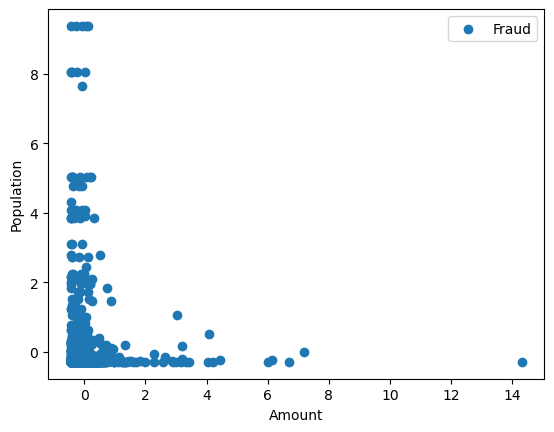

In [34]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [35]:
smote_X_DF = pd.DataFrame(smote_X,columns=X.columns)
smote_y_DF = pd.DataFrame(smote_y,columns=["is_fraud"])
raw_temp = pd.concat([smote_X_DF, smote_y_DF], axis =1)

C:\Users\Bill\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


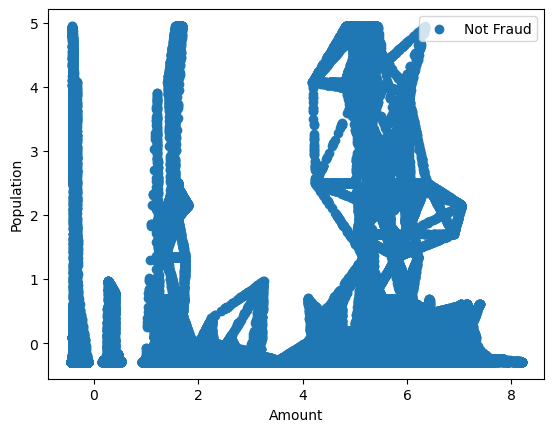

In [36]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. test on Holdout

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [38]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [39]:
resampling_methods = {
    "over" : RandomOverSampler(),
    "under" : RandomUnderSampler(),
    "smote" : SMOTE()
}

model_configs = {
    "LOG" : LogisticRegression(),
    "LASSO": LogisticRegression(penalty = "l1",
                                solver = "liblinear", C = 2.),
    "DTREE" : DecisionTreeClassifier()
}

In [40]:
trained_models = {}

In [41]:
def calc_perf_metric(y_true, y_pred):
    tp, fp, fn, tn = confusion_matrix(y_true, y_pred).ravel()
    
    sensitivity = tp / (tp + fn)
    specificiy = tn / (tn + fp)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    return(sensitivity, specificiy, precision, recall, f1)

In [42]:
trained_models = {}
results = []

In [43]:
for resample_key, resampler in resampling_methods.items():
    resample_X, resample_y = resampler.fit_resample(X_train, y_train)
    
    for model_key, model in model_configs.items():
        combined_key = f"{resample_key}_{model_key}"
        
        m = model.fit(resample_X, resample_y)
        
        trained_models[combined_key] = m
        
        y_pred = m.predict(X_test)
        
        sensitivity, specificiy, precision, recall, f1 = calc_perf_metric(y_test, y_pred)
        
        results.append({"Model": combined_key,
                        "Sensitivity": sensitivity,
                        "Specificity": specificiy,
                        "Precision": precision,
                        "Recall": recall, 
                        "F1": f1})

In [44]:
results_df = pd.DataFrame(results)

In [45]:
results_df

,Model,Sensitivity,Specificity,Precision,Recall,F1
0,over_LOG,0.998999,0.028789,0.028789,0.763407,0.055485
1,over_LASSO,0.998999,0.028789,0.028789,0.763407,0.055485
2,over_DTREE,0.998194,0.540453,0.540453,0.526814,0.533546
3,under_LOG,0.998955,0.024773,0.024773,0.757098,0.047976
4,under_LASSO,0.998968,0.024743,0.024743,0.760252,0.047927
5,under_DTREE,0.999783,0.057926,0.057926,0.946372,0.109170
6,smote_LOG,0.998996,0.028038,0.028038,0.763407,0.054090
7,smote_LASSO,0.998996,0.028045,0.028045,0.763407,0.054102
8,smote_DTREE,0.998849,0.271394,0.271394,0.700315,0.391189


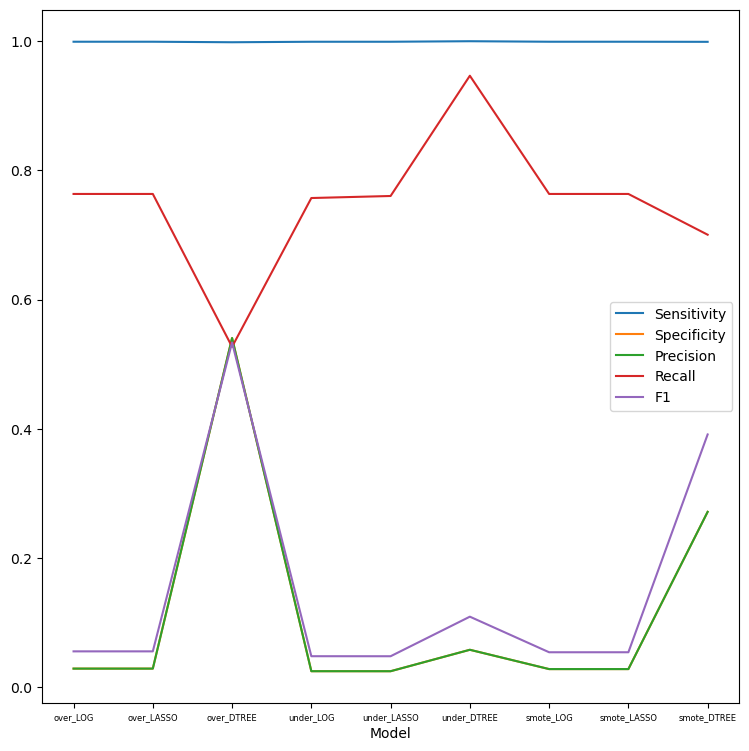

In [46]:
import matplotlib.pyplot as plt

results_df.plot(x="Model", y=["Sensitivity", "Specificity", "Precision","Recall", "F1"],
 kind="line", figsize=(9, 9))
plt.xticks(fontsize=6)

# Display plot
plt.show()


#### Based on the dataframe and the plot, I will say that the over_sample model has the best performance comparing to others. Over_sample model has the highest F1 score and the lowest recall score.